In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import LabelEncoder

# Лабораторная работа №4

# 1. Загрузка данных датасета в переменную

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
data['score'] = (data['math score'] + data['reading score'] + data['writing score'])/3

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# 2. Задача регрессии

# 3. Предобработка данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

В нашем случае пропусков не обнаружено

In [8]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          72             72             74   
1                          0          69       

In [9]:
data.dtypes

gender                           int32
race/ethnicity                   int32
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                       int64
reading score                    int64
writing score                    int64
score                          float64
dtype: object

In [10]:
data['reading score'] = data['reading score'].astype('int32')
data['writing score'] = data['writing score'].astype('int32')
data['math score'] = data['reading score'].astype('int32')
data['score'] = data['reading score'].astype('int32')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int32
 1   race/ethnicity               1000 non-null   int32
 2   parental level of education  1000 non-null   int32
 3   lunch                        1000 non-null   int32
 4   test preparation course      1000 non-null   int32
 5   math score                   1000 non-null   int32
 6   reading score                1000 non-null   int32
 7   writing score                1000 non-null   int32
 8   score                        1000 non-null   int32
dtypes: int32(9)
memory usage: 35.3 KB


In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,0,1,1,1,1,72,72,74,72
1,0,2,4,1,0,90,90,88,90
2,0,1,3,1,1,95,95,93,95
3,1,0,0,0,1,57,57,44,57
4,1,2,4,1,1,78,78,75,78


### C. Нормирование численных переменных датасета

In [13]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['math score', 'reading score', 'writing score', 'score']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,math score,reading score,writing score,score
0,0.662651,0.662651,0.711111,0.662651
1,0.879518,0.879518,0.866667,0.879518
2,0.939759,0.939759,0.922222,0.939759
3,0.481928,0.481928,0.377778,0.481928
4,0.734940,0.734940,0.722222,0.734940


### A. Разделение выборки на тестовую и тренировочную

In [14]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,0.628542,0.628542,0.645044,0.628542
std,0.499926,1.157179,1.829522,0.478753,0.479652,0.175906,0.175906,0.168841,0.175906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.506024,0.506024,0.530556,0.506024
50%,0.000000,2.000000,2.000000,1.000000,1.000000,0.638554,0.638554,0.655556,0.638554
75%,1.000000,3.000000,4.000000,1.000000,1.000000,0.746988,0.746988,0.766667,0.746988
max,1.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X = data.drop(columns=['score'])
y = data['score']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Dataset и Dataloader

In [17]:
from torch.utils.data import Dataset, DataLoader

In [18]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [19]:
# Создание объектов Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

# Создание объектов DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Обучение модели на тренировочном множестве

In [20]:
import torch.nn as nn
import torch.optim as optim

In [21]:
# Функция потерь
criterion = nn.MSELoss()

# Количество эпох
epochs = 30

### А.Простая модель с оптимизатором

In [22]:
# Определение модели
model1 = nn.Linear(X_train.shape[1], 1)

# Определение оптимизатора
optimizer1 = optim.SGD(model1.parameters(), lr=0.001)

### B. Модель с 1 внешним слоем

In [23]:
# Определение модели
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Определение оптимизатора
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

### C. Модель с 3+ слоями

In [24]:
# Определение модели
model3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Определение оптимизатора
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

# 6. Подсчет loss на train и test выборках и графики

In [25]:
# Инициализация списков для сохранения потерь
train_losses1, test_losses1 = [], []
train_losses2, test_losses2 = [], []
train_losses3, test_losses3 = [], []


In [26]:
# Функция для расчета потерь
def calculate_loss(model, loader):
    total_loss = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())
        total_loss += loss.item()
    return total_loss / len(loader)

In [27]:
# Расчет потерь для каждой эпохи
for epoch in range(epochs):
    for model, optimizer, train_losses, test_losses in [(model1, optimizer1, train_losses1, test_losses1), 
                                                        (model2, optimizer2, train_losses2, test_losses2), 
                                                        (model3, optimizer3, train_losses3, test_losses3)]:
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()

        train_loss = calculate_loss(model, train_loader)
        test_loss = calculate_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


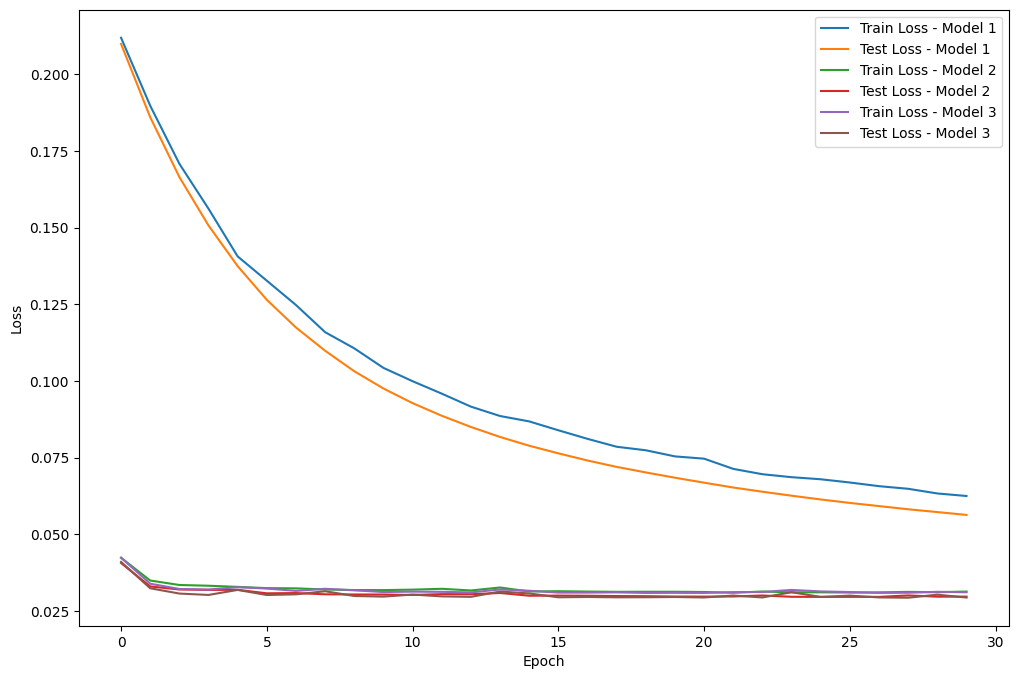

In [28]:
# Визуализация потерь
plt.figure(figsize=(12, 8))
plt.plot(train_losses1, label='Train Loss - Model 1')
plt.plot(test_losses1, label='Test Loss - Model 1')
plt.plot(train_losses2, label='Train Loss - Model 2')
plt.plot(test_losses2, label='Test Loss - Model 2')
plt.plot(train_losses3, label='Train Loss - Model 3')
plt.plot(test_losses3, label='Test Loss - Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Подсчет метрик на train и test множествах для регресии(Mae)

In [29]:
import torch

for param in model1.parameters():
    print(param)

# Проверка на NaN в model1
if torch.isnan(model1(torch.zeros(1, X_train.shape[1]))).any():
    print("model1 содержит NaN значения")
else:
    print("model1 не содержит NaN значения")

if torch.isnan(model2(torch.zeros(1, X_train.shape[1]))).any():
    print("model2 содержит NaN значения")
else:
    print("model2 не содержит NaN значения")

# Проверка на NaN в model2
if torch.isnan(model3(torch.zeros(1, X_train.shape[1]))).any():
    print("model3 содержит NaN значения")
else:
    print("model3 не содержит NaN значения")


Parameter containing:
tensor([[ 0.2103, -0.0794, -0.0090, -0.0354,  0.2488,  0.3179,  0.3282, -0.0244]],
       requires_grad=True)
Parameter containing:
tensor([0.2092], requires_grad=True)
model1 не содержит NaN значения
model2 не содержит NaN значения
model3 не содержит NaN значения


In [30]:
from sklearn.metrics import mean_absolute_error

# Функция для расчета MAE
def calculate_mae(model, loader):
    total_mae = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        mae = mean_absolute_error(outputs.detach().numpy(), targets.numpy())
        total_mae += mae
    return total_mae / len(loader)

# Расчет MAE для каждой модели на тренировочных и тестовых данных
train_mae1 = calculate_mae(model1, train_loader)
test_mae1 = calculate_mae(model1, test_loader)

train_mae2 = calculate_mae(model2, train_loader)
test_mae2 = calculate_mae(model2, test_loader)

train_mae3 = calculate_mae(model3, train_loader)
test_mae3 = calculate_mae(model3, test_loader)

# Вывод результатов
print(f'Модель 1 - Тренировочная MAE: {train_mae1}, Тестовая MAE: {test_mae1}')
print(f'Модель 2 - Тренировочная MAE: {train_mae2}, Тестовая MAE: {test_mae2}')
print(f'Модель 3 - Тренировочная MAE: {train_mae3}, Тестовая MAE: {test_mae3}')


Модель 1 - Тренировочная MAE: 0.18071283360157747, Тестовая MAE: 0.1758629004567182
Модель 2 - Тренировочная MAE: 0.13360804348286376, Тестовая MAE: 0.12923448549811176
Модель 3 - Тренировочная MAE: 0.13537715646875909, Тестовая MAE: 0.13210997596165092


# 8. Сравненеи метрик и выводы

In [32]:
# Сравнение метрик
mae_values = {'Model 1': [train_mae1, test_mae1],
              'Model 2': [train_mae2, test_mae2],
              'Model 3': [train_mae3, test_mae3]}

mae_df = pd.DataFrame(mae_values, index=['Train MAE', 'Test MAE'])
print(mae_df)

# Ответы на вопросы
best_model = mae_df.idxmin(axis=1)['Test MAE']
print(f'1. Лучше всего справилась модель: {best_model}')

overfitting = mae_df.loc['Train MAE'] < 0.1
print(f'2. Переобучение имеет место для следующих моделей: {overfitting[overfitting].index.tolist()}')

underfitting = abs(mae_df.loc['Train MAE'] - mae_df.loc['Test MAE']) > 0.1
print(f'3. Недообучение имеет место для следующих моделей: {underfitting[underfitting].index.tolist()}')

print('4. Для улучшения метрик моделей можно попробовать следующее:')
print('   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)')
print('   - Использовать другую функцию потерь или оптимизатор')
print('   - Провести больше эпох обучения')
print('   - Использовать регуляризацию для предотвращения переобучения')
print('   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)')


            Model 1   Model 2   Model 3
Train MAE  0.180713  0.133608  0.135377
Test MAE   0.175863  0.129234  0.132110
1. Лучше всего справилась модель: Model 2
2. Переобучение имеет место для следующих моделей: []
3. Недообучение имеет место для следующих моделей: []
4. Для улучшения метрик моделей можно попробовать следующее:
   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)
   - Использовать другую функцию потерь или оптимизатор
   - Провести больше эпох обучения
   - Использовать регуляризацию для предотвращения переобучения
   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)
